In [2]:
!pip install missingno

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Public\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



     --------------------------------------- 14.7/14.7 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
#import missingno as msno

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
diveFeatures_data = pd.read_excel('lr_dataset_consolidated.xlsx')
diveFeatures_data.shape

(2218, 18)

In [3]:
diveFeatures_data.head()

,vidpath,actualscore,predscore,pred_soms.,pred_twist,fine_grained_soms.,fine_grained_twist,modify_soms.,modify_twist,bend_angle,entry_angle,ctr_area,mean_splash_size,max_splash_size,mean_splash_ratio,max_splash_ratio,mean_splash_index,max_splash_index
0,FINADiving_MTL_256s/01/29,0.642857,0.655271,0.79,0.78,2.5,2.5,1.5,1.0,165.138334,84.805571,2245.5,7244.800000,9329.0,4.949217,6.373018,0.468251,0.600755
1,FINADiving_MTL_256s/FINADivingWorldCup2021_Wom...,0.439024,0.446520,2.34,NaN,3.5,NaN,2.5,NaN,164.780952,79.215702,1113.0,4394.300000,5475.0,3.001925,3.740195,0.263239,0.310943
2,FINADiving_MTL_256s/05/34,0.627178,0.661146,1.56,0.71,2.5,1.5,1.5,0.5,168.835311,82.998732,1850.0,4138.250000,5346.0,2.827007,3.652070,0.244824,0.301242
3,FINADiving_MTL_256s/07/31,0.372387,0.376354,3.94,NaN,NaN,NaN,3.5,NaN,153.237151,61.389540,2183.5,8081.500000,12738.0,5.520801,8.701845,0.528428,0.857104
4,FINADiving_MTL_256s/26/87,0.423345,0.498622,2.33,NaN,3.5,NaN,2.5,NaN,156.319944,66.037511,997.5,4826.454545,5856.0,3.297147,4.000471,0.294321,0.339593


mean_splash_size, bend_angle, entry_angle

In [4]:
diveFeatures_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vidpath             2218 non-null   object 
 1   actualscore         2218 non-null   float64
 2   predscore           2218 non-null   float64
 3   pred_soms.          2217 non-null   float64
 4   pred_twist          636 non-null    float64
 5   fine_grained_soms.  2187 non-null   float64
 6   fine_grained_twist  638 non-null    float64
 7   modify_soms.        2217 non-null   float64
 8   modify_twist        636 non-null    float64
 9   bend_angle          2218 non-null   float64
 10  entry_angle         2218 non-null   float64
 11  ctr_area            2218 non-null   float64
 12  mean_splash_size    2218 non-null   float64
 13  max_splash_size     2218 non-null   float64
 14  mean_splash_ratio   2218 non-null   float64
 15  max_splash_ratio    2218 non-null   float64
 16  mean_s

In [5]:
diveFeatures_data.describe()

,actualscore,predscore,pred_soms.,pred_twist,fine_grained_soms.,fine_grained_twist,modify_soms.,modify_twist,bend_angle,entry_angle,ctr_area,mean_splash_size,max_splash_size,mean_splash_ratio,max_splash_ratio,mean_splash_index,max_splash_index
count,2218.000000,2218.000000,2217.000000,636.000000,2187.000000,638.000000,2217.000000,636.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000
mean,0.581779,0.607222,2.692386,0.896525,2.972108,1.790752,2.764096,0.900157,161.493362,75.893680,1463.827547,5905.357976,8049.779080,4.019549,5.381196,0.370375,0.491578
std,0.146558,0.114224,1.637679,0.392635,0.689019,0.638035,1.251285,0.408396,16.670670,10.744328,606.499214,3012.962264,3644.294463,2.009676,2.174184,0.211580,0.239327
min,0.000000,0.112724,0.140000,0.000000,1.500000,0.500000,1.500000,0.500000,0.000000,0.000000,0.000000,734.200000,1340.000000,0.501562,0.915408,0.000000,0.000000
25%,0.496516,0.540175,1.180000,0.610000,2.500000,1.500000,1.500000,0.500000,156.161260,71.146841,1043.000000,3583.181818,5544.250000,2.447817,3.787502,0.204903,0.316150
50%,0.594982,0.622127,2.630000,0.870000,2.500000,1.500000,2.500000,1.000000,163.072487,77.005383,1442.250000,5344.677778,7293.000000,3.651166,4.982144,0.331592,0.447652
75%,0.677272,0.692000,4.040000,1.140000,3.500000,2.000000,4.500000,1.000000,170.035503,83.040018,1864.625000,7567.977778,9635.750000,5.169993,6.582572,0.491495,0.623821
max,1.000000,0.841193,8.360000,2.790000,4.500000,3.500000,4.500000,3.000000,180.000000,90.000000,4518.000000,18266.181818,24398.000000,10.000000,10.000000,1.000000,1.000000


In [6]:
missing_data_columns = 100*(diveFeatures_data.loc[:,diveFeatures_data.isnull().sum() > 0].isnull().sum().sort_values(ascending = False))/len(diveFeatures_data)
missing_data_columns

pred_twist            71.325518
modify_twist          71.325518
fine_grained_twist    71.235347
fine_grained_soms.     1.397656
pred_soms.             0.045086
modify_soms.           0.045086
dtype: float64

In [3]:
numerical_cols = ['actualscore', 'predscore','fine_grained_soms.', 'fine_grained_twist', 'modify_soms.',
       'modify_twist', 'bend_angle', 'entry_angle','ctr_area','mean_splash_index']

print(numerical_cols)#'mean_splash_size',

['actualscore', 'predscore', 'fine_grained_soms.', 'fine_grained_twist', 'modify_soms.', 'modify_twist', 'bend_angle', 'entry_angle', 'ctr_area', 'mean_splash_index']


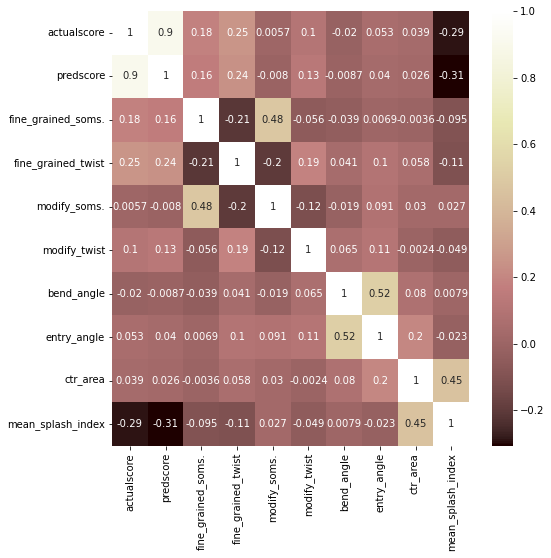

In [8]:
#check the correlation matrix for possible relation between quantitative variables

corr = diveFeatures_data[numerical_cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='pink')
plt.show()

#### Creating the Train and Test Dataset:

In [3]:
X = diveFeatures_data.drop(columns = ['actualscore','vidpath'],axis=1)
y = diveFeatures_data['actualscore']
print('X Shape : {0}, Y Shape : {1}'.format(X.shape,y.shape))

X Shape : (2218, 16), Y Shape : (2218,)


In [4]:
np.random.seed(0)
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [5]:
print(X_train.shape)
print(y_train.shape)
print('==================')
print(X_test.shape)
print(y_test.shape)

(1774, 16)
(1774,)
(444, 16)
(444,)


In [6]:
X_train.head()

,predscore,pred_soms.,pred_twist,fine_grained_soms.,fine_grained_twist,modify_soms.,modify_twist,bend_angle,entry_angle,ctr_area,mean_splash_size,max_splash_size,mean_splash_ratio,max_splash_ratio,mean_splash_index,max_splash_index
1634,0.744628,4.04,NaN,2.5,NaN,4.5,NaN,162.133373,86.633539,1443.5,5441.090909,7460.0,3.717030,5.096229,0.338526,0.460210
367,0.391109,4.86,NaN,3.5,NaN,4.5,NaN,177.482101,87.754257,1221.0,14423.818182,17871.0,9.853496,10.000000,0.984576,1.000000
354,0.526634,3.06,NaN,3.5,NaN,3.0,NaN,171.907605,81.702855,1016.5,5829.727273,7732.0,3.982523,5.282043,0.366477,0.480664
2013,0.778824,3.59,NaN,3.5,NaN,3.5,NaN,154.609463,78.023868,1969.0,3834.545455,5589.0,2.619534,3.818073,0.222981,0.319515
416,0.593065,1.25,1.87,2.0,1.5,1.5,2.0,161.241350,75.068583,537.0,4080.888889,7147.0,2.787821,4.882406,0.240698,0.436673


Checking for null values in numerical columns:

In [7]:
som_median = X_train['modify_soms.'].median()
twist_median = X_train['modify_twist'].median()
predScore_median = X_train['predscore'].median()
print(som_median,twist_median,predScore_median)

2.5 1.0 0.6223464999999999


In [8]:
X_train['pred_somersault'] = np.where(X_train['modify_soms.'].notnull(),X_train['modify_soms.'],
                                      np.where((X_train['fine_grained_soms.'].isnull()),0,som_median))

X_train['pred_twist'] = np.where(X_train['modify_twist'].notnull(),X_train['modify_twist'],
                                      np.where((X_train['fine_grained_twist'].isnull()),0,twist_median))

X_train['updated_predscore'] = X_train['predscore'].fillna(predScore_median)

In [9]:
X_test['pred_somersault'] = np.where(X_test['modify_soms.'].notnull(),X_test['modify_soms.'],
                                      np.where((X_test['fine_grained_soms.'].isnull()),0,som_median))

X_test['pred_twist'] = np.where(X_test['modify_twist'].notnull(),X_test['modify_twist'],
                                      np.where((X_test['fine_grained_twist'].isnull()),0,twist_median))
X_test['updated_predscore'] = X_test['predscore'].fillna(predScore_median)

###### Checking null updation:

In [35]:
X_train.head()

,predscore,pred_soms.,pred_twist,fine_grained_soms.,fine_grained_twist,modify_soms.,modify_twist,bend_angle,entry_angle,ctr_area,mean_splash_size,max_splash_size,mean_splash_ratio,max_splash_ratio,mean_splash_index,max_splash_index,pred_somersault,updated_predscore
1634,0.744628,4.04,0.0,2.5,NaN,4.5,NaN,162.133373,86.633539,1443.5,5441.090909,7460.0,3.717030,5.096229,0.338526,0.460210,4.5,0.744628
367,0.391109,4.86,0.0,3.5,NaN,4.5,NaN,177.482101,87.754257,1221.0,14423.818182,17871.0,9.853496,10.000000,0.984576,1.000000,4.5,0.391109
354,0.526634,3.06,0.0,3.5,NaN,3.0,NaN,171.907605,81.702855,1016.5,5829.727273,7732.0,3.982523,5.282043,0.366477,0.480664,3.0,0.526634
2013,0.778824,3.59,0.0,3.5,NaN,3.5,NaN,154.609463,78.023868,1969.0,3834.545455,5589.0,2.619534,3.818073,0.222981,0.319515,3.5,0.778824
416,0.593065,1.25,2.0,2.0,1.5,1.5,2.0,161.241350,75.068583,537.0,4080.888889,7147.0,2.787821,4.882406,0.240698,0.436673,1.5,0.593065


In [36]:
X_test.head()

,predscore,pred_soms.,pred_twist,fine_grained_soms.,fine_grained_twist,modify_soms.,modify_twist,bend_angle,entry_angle,ctr_area,mean_splash_size,max_splash_size,mean_splash_ratio,max_splash_ratio,mean_splash_index,max_splash_index,pred_somersault,updated_predscore
399,0.596594,5.95,0.0,3.5,NaN,4.5,NaN,169.777831,86.185925,1761.5,7194.200000,9380.0,4.914650,6.407859,0.464612,0.604590,4.5,0.596594
1729,0.514946,5.74,0.0,3.5,NaN,4.5,NaN,169.274595,88.567904,1204.0,2507.555556,5000.0,1.713013,3.415703,0.127542,0.275224,4.5,0.514946
913,0.713957,5.54,0.0,3.5,NaN,4.5,NaN,148.992473,76.651273,1781.0,6024.923077,7977.0,4.115869,5.449412,0.380516,0.499087,4.5,0.713957
2127,0.332056,0.94,0.0,1.5,NaN,1.5,NaN,170.073754,66.037511,154.5,7500.555556,11227.0,5.123934,7.669619,0.486645,0.743480,1.5,0.332056
1514,0.503922,1.18,0.0,2.5,NaN,1.5,NaN,134.063878,81.469234,952.5,4882.357143,8353.0,3.335336,5.706273,0.298341,0.527362,1.5,0.503922


In [37]:
columnsToTrain = ['pred_twist','bend_angle','entry_angle','pred_somersault','updated_predscore',
                 'mean_splash_index','ctr_area']
X_train = X_train[columnsToTrain]
X_train.shape

(1774, 7)

In [38]:
X_test = X_test[columnsToTrain]
X_test.shape

(444, 7)

<Figure size 576x576 with 0 Axes>

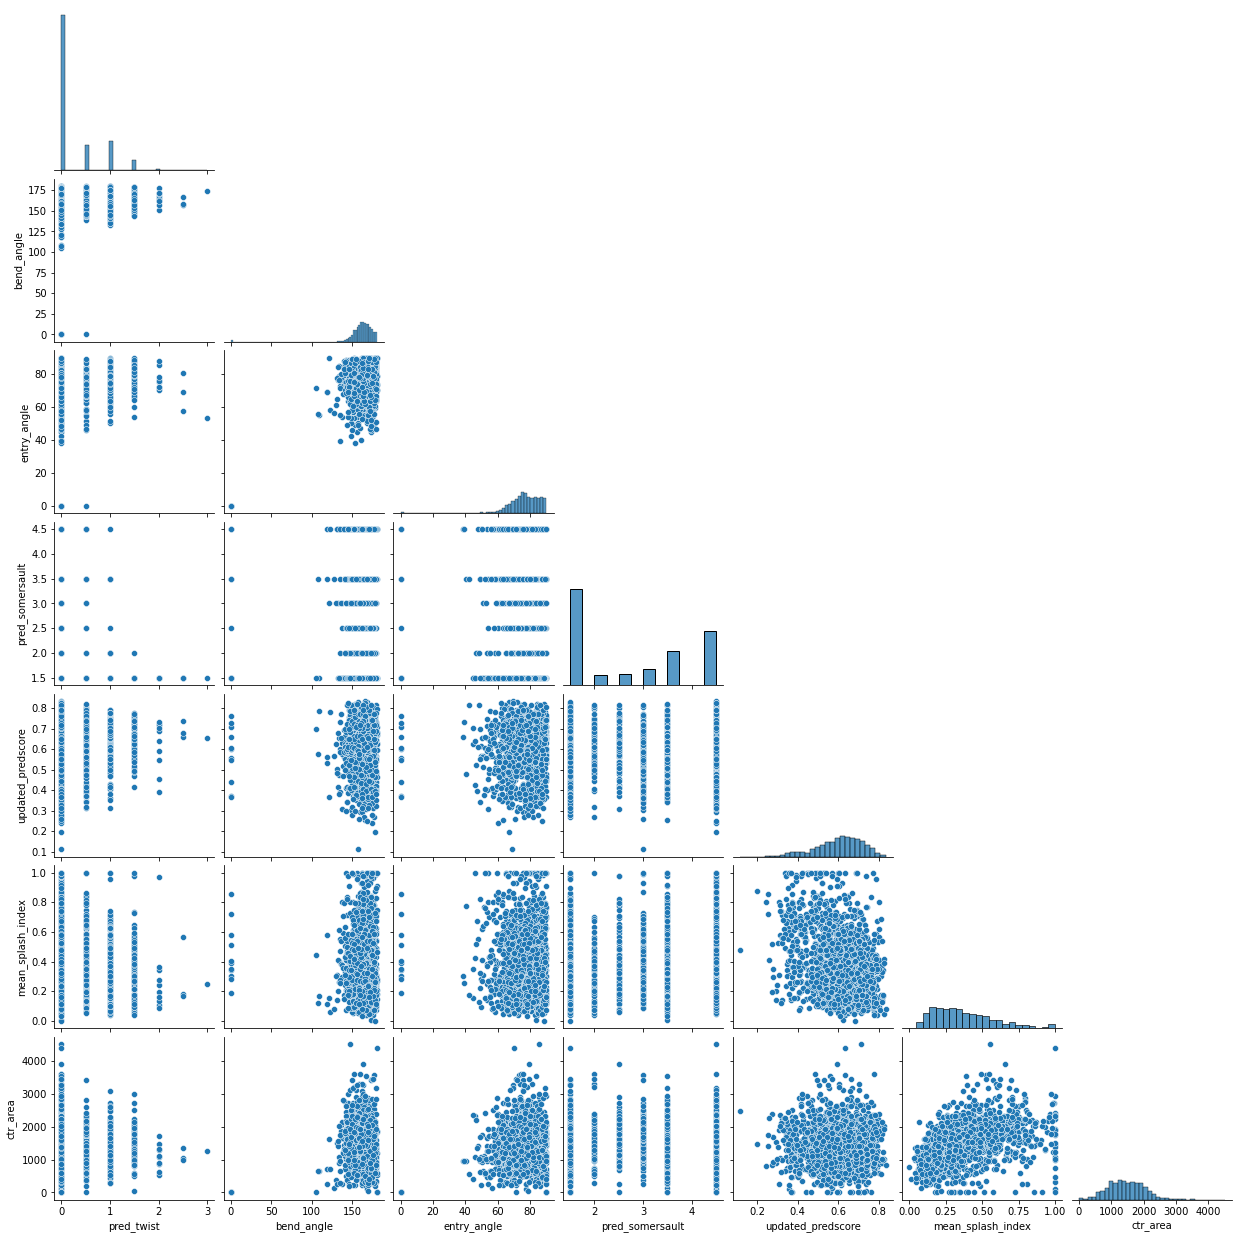

In [20]:
plt.figure(figsize=(8,8))
sns.pairplot(X_train[columnsToTrain], corner=True)
plt.show()

In [21]:
def univariate_numerical(num_list,y_train):
    for num in num_list:
        plt.figure(figsize=(8,5))
        sns.set(style = 'darkgrid')
        corr1, _ = pearsonr(X_train[num], y_train)
        corr2, _ = spearmanr(X_train[num], y_train)
        print('Pearsons correlation: {0} for {1}'.format(round(corr1,3),num))
        print('Spearmans correlation: {0} for {1}'.format(round(corr2,3),num))
        sns.jointplot(x=num,y=y_train,data = X_train,kind='reg',dropna=True)
        plt.xlabel(num.upper())
        plt.ylabel('Actual_Score')
        plt.xticks(rotation = 45)
        plt.show()

Pearsons correlation: 0.097 for pred_twist
Spearmans correlation: 0.082 for pred_twist


<Figure size 576x360 with 0 Axes>

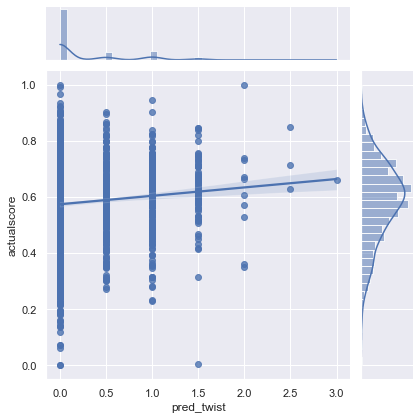

Pearsons correlation: -0.015 for bend_angle
Spearmans correlation: -0.047 for bend_angle


<Figure size 576x360 with 0 Axes>

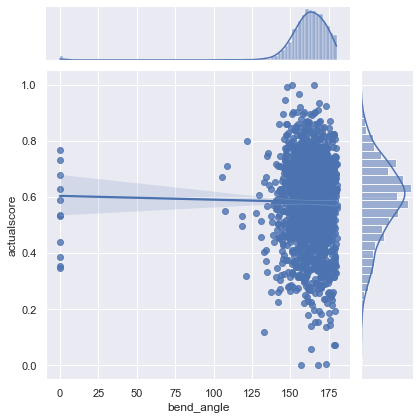

Pearsons correlation: 0.057 for entry_angle
Spearmans correlation: 0.053 for entry_angle


<Figure size 576x360 with 0 Axes>

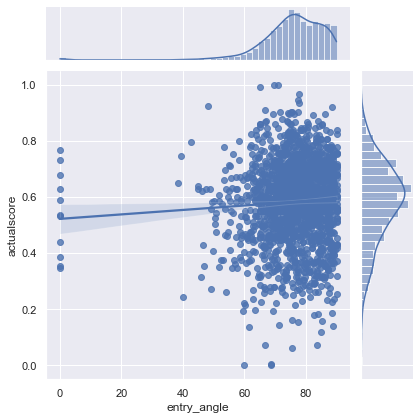

Pearsons correlation: 0.001 for pred_somersault
Spearmans correlation: 0.007 for pred_somersault


<Figure size 576x360 with 0 Axes>

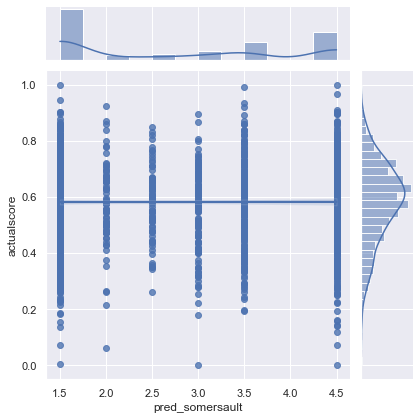

Pearsons correlation: 0.904 for updated_predscore
Spearmans correlation: 0.928 for updated_predscore


<Figure size 576x360 with 0 Axes>

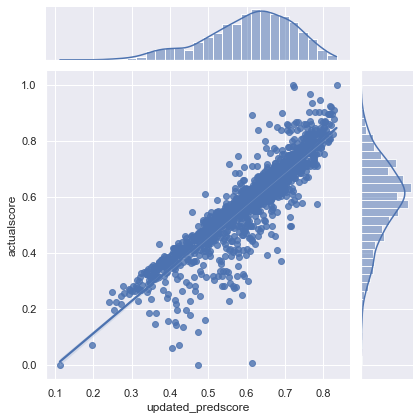

Pearsons correlation: -0.295 for mean_splash_index
Spearmans correlation: -0.238 for mean_splash_index


<Figure size 576x360 with 0 Axes>

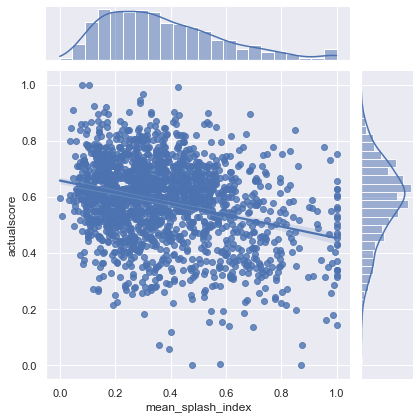

Pearsons correlation: 0.029 for ctr_area
Spearmans correlation: 0.049 for ctr_area


<Figure size 576x360 with 0 Axes>

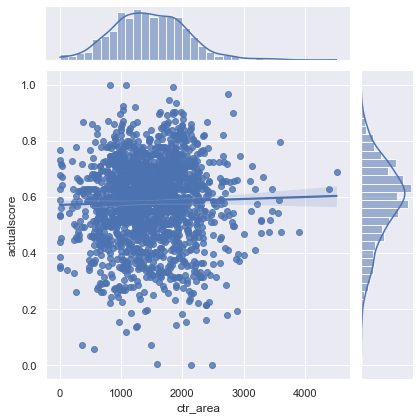

In [22]:
univariate_numerical(columnsToTrain,y_train)

In [23]:
X_train.isnull().sum().sort_values(ascending = False)

pred_twist           0
bend_angle           0
entry_angle          0
pred_somersault      0
updated_predscore    0
mean_splash_index    0
ctr_area             0
dtype: int64

In [24]:
X_test.isnull().sum().sort_values(ascending = False)

pred_twist           0
bend_angle           0
entry_angle          0
pred_somersault      0
updated_predscore    0
mean_splash_index    0
ctr_area             0
dtype: int64

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train.shape

(1774, 7)

In [40]:
X_test = scaler.transform(X_test)
X_test.shape

(444, 7)

In [23]:
joblib.dump(scaler,r'minMaxScaler') 

['minMaxScaler']

##### RIDGE REGRESSION

In [27]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [28]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [110]:
#Fitting Ridge model for alpha = 0.05
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [111]:
# Lets calculate some metrics such as R2 score and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print('Test MSE: ',mse_test_lr)

test_corr1, _ = pearsonr(y_pred_test_ridge, y_test)
test_corr2, _ = spearmanr(y_pred_test_ridge, y_test)

print('Test Pearson R Correlation : ',test_corr1)
print('Test Spearman Correlation : ',test_corr2)

Train R2:  0.8174301722301721
Test R2:  0.8160070894534557
Train MSE:  0.003898154252222781
Test MSE:  0.004036961102514882
Test Pearson R Correlation :  0.9051582931383957
Test Spearman Correlation :  0.9211650590989877


###### LASSO REGRESSION

In [35]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()
folds = 5
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [37]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [38]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print('Test MSE: ',mse_test_lr)

test_corr1, _ = pearsonr(y_pred_test_lasso, y_test)
test_corr2, _ = spearmanr(y_pred_test_lasso, y_test)

print('Test Pearson R Correlation : ',test_corr1)
print('Test Spearman Correlation : ',test_corr2)

Train R2:  0.8152738940518025
Test R2:  0.8165368199335317
Train MSE:  0.00394419419788447
Test MSE:  0.004025338364788027
Test Pearson R Correlation :  0.9058908939608109
Test Spearman Correlation :  0.9222624968794633


###### Residual Analysis:

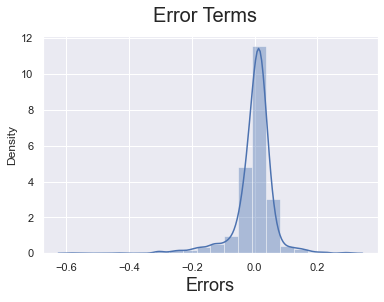

In [39]:
y_train_lasso = lasso.predict(X_train)
fig = plt.figure()
sns.distplot((y_train - y_train_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)
plt.show()

Errors follow a normal distribution with mean = 0. The assumption is verified here and it holds true.

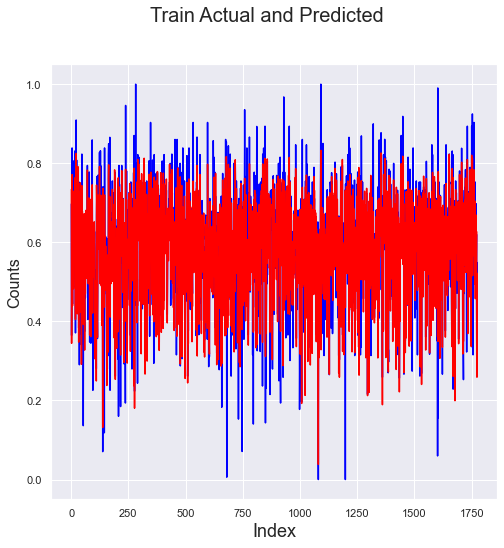

In [41]:
#Actual vs Predicted
c = [i for i in range(1,1775,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_train_lasso, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Train Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

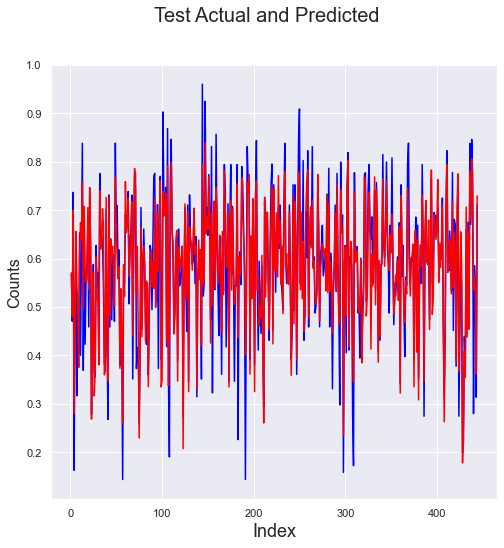

In [42]:
#Actual vs Predicted
c = [i for i in range(1,445,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred_test_lasso, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Test Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

##### Homoscedasticity Assumption Check :

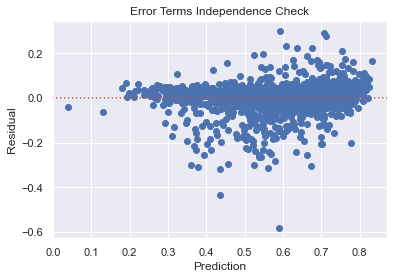

In [43]:
plt.scatter(y_train_lasso,(y_train - y_train_lasso))
plt.axhline(y=0, color='r', linestyle=':')
plt.title('Error Terms Independence Check')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

###### Checking the relationship between y_test and y_pred:

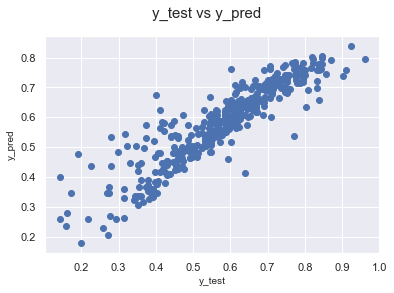

In [44]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test_lasso)
fig.suptitle('y_test vs y_pred', fontsize = 15)  
plt.xlabel('y_test', fontsize = 10)                   
plt.ylabel('y_pred', fontsize = 10)   
plt.show()

In [45]:
betas = pd.DataFrame()
betas['Features'] = columnsToTrain
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(10)

,Features,Ridge,Lasso
0,pred_twist,0.023026,0.000000
1,bend_angle,-0.036143,-0.000000
2,entry_angle,0.030944,0.000000
3,pred_somersault,0.009141,0.000000
4,updated_predscore,0.802717,0.794396
5,mean_splash_index,-0.024483,-0.000000
6,ctr_area,0.027014,0.000000


###### MLP REGRESSOR

In [46]:
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')

In [211]:
# params = { 'hidden_layer_sizes' : [100,100],
#     'activation' : 'relu', 'solver' : 'sgd',
#     'alpha' : 0.01, 'batch_size' : 10,
#     'random_state' : 0, 'tol' : 0.0001,
#     'nesterovs_momentum' : True,
#     'learning_rate' : 'adaptive',
#     'learning_rate_init' : 0.001,
#     'max_iter' : 1000, 'shuffle' : True,
#     'n_iter_no_change' : 50, 'verbose' : True,
#          'momentum':0.9,'early_stopping':True}

In [47]:
params = { 'hidden_layer_sizes' : [256,124],#(80,50) , (256,124)
    'activation' : 'relu', 'solver' : 'adam',
    'alpha' : 0.01, 'batch_size' : 10,#dont change
    'random_state' : 0, 'tol' : 0.0001,
    'nesterovs_momentum' : True,
    'learning_rate' : 'adaptive',
    'learning_rate_init' : 0.001,#dont change
    'max_iter' : 500, 'shuffle' : True,
    'n_iter_no_change' : 50, 'verbose' : True,'early_stopping':True }

In [48]:
print("Creating 8-(100-100)-1 relu neural network ")
net = MLPRegressor(**params)

Creating 8-(100-100)-1 relu neural network 


In [49]:
print("Training with bat sz = " + \
    str(params['batch_size']) + " lrn rate = " + \
    str(params['learning_rate_init']) + " ")
print("Stop if no change " + \
    str(params['n_iter_no_change']) + " iterations ")
net.fit(X_train, y_train)
print("Done ")

Training with bat sz = 10 lrn rate = 0.001 
Stop if no change 50 iterations 
Iteration 1, loss = 0.04960149
Validation score: 0.795289
Iteration 2, loss = 0.01890230
Validation score: 0.697824
Iteration 3, loss = 0.01286008
Validation score: 0.803099
Iteration 4, loss = 0.00971011
Validation score: 0.794116
Iteration 5, loss = 0.00765488
Validation score: 0.783046
Iteration 6, loss = 0.00641347
Validation score: 0.797134
Iteration 7, loss = 0.00542979
Validation score: 0.679875
Iteration 8, loss = 0.00489905
Validation score: 0.772946
Iteration 9, loss = 0.00454686
Validation score: 0.775868
Iteration 10, loss = 0.00424550
Validation score: 0.802921
Iteration 11, loss = 0.00405590
Validation score: 0.791421
Iteration 12, loss = 0.00391687
Validation score: 0.778596
Iteration 13, loss = 0.00392783
Validation score: 0.798262
Iteration 14, loss = 0.00373555
Validation score: 0.774372
Iteration 15, loss = 0.00366588
Validation score: 0.791483
Iteration 16, loss = 0.00365542
Validation scor

In [50]:
print("Compute model performance :")
y_pred_train_mlp = net.predict(X_train)
y_pred_test_mlp = net.predict(X_test)


metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_mlp)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_mlp)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_mlp)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_mlp)
print('Test MSE: ',mse_test_lr)


test_corr1, _ = pearsonr(y_pred_test_mlp, y_test)
test_corr2, _ = spearmanr(y_pred_test_mlp, y_test)

print('Test Pearson R Correlation : ',test_corr1)
print('Test Spearman Correlation : ',test_corr2)

print('Parameters : ', net.get_params)

Compute model performance :
Train R2:  0.8178900268295399
Test R2:  0.8147383574116907
Train MSE:  0.0038883356300340724
Test MSE:  0.004064798163665256
Test Pearson R Correlation :  0.9037909575566185
Test Spearman Correlation :  0.9189269935204395
Parameters :  <bound method BaseEstimator.get_params of MLPRegressor(alpha=0.01, batch_size=10, early_stopping=True,
             hidden_layer_sizes=[256, 124], learning_rate='adaptive',
             max_iter=500, n_iter_no_change=50, random_state=0, verbose=True)>


In [51]:
print('Best Validation Score :', net.best_validation_score_)
#print('Best Loss : ', net.best_loss_)

Best Validation Score : 0.8066101973275455


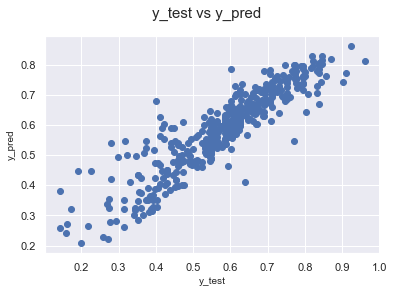

In [52]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test_mlp)
fig.suptitle('y_test vs y_pred', fontsize = 15)  
plt.xlabel('y_test', fontsize = 10)                   
plt.ylabel('y_pred', fontsize = 10)   
plt.show()

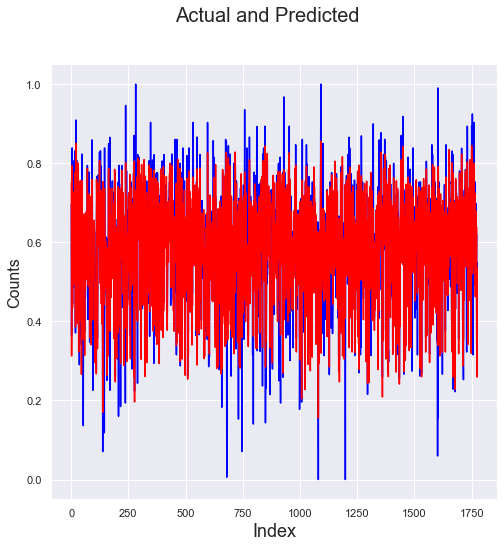

In [53]:
#Actual vs Predicted - Train
c = [i for i in range(1,1775,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred_train_mlp, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

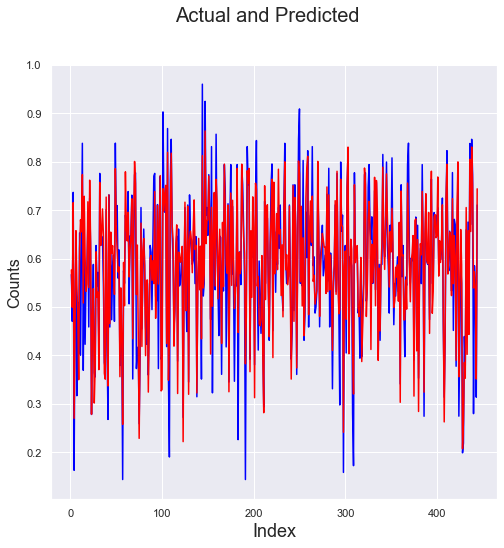

In [54]:
#Actual vs Predicted - Test
c = [i for i in range(1,445,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred_test_mlp, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

In [17]:
from sklearn.svm import SVR
params = {'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

svr = SVR(kernel='linear')

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = svr, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                               0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                               6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                               1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [18]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'C': 0.05}


In [19]:
svr = SVR(C=0.9,kernel='linear')
svr.fit(X_train, y_train) 

SVR(C=0.9, kernel='linear')

In [20]:
# Lets calculate some metrics such as R2 score and RMSE

y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_svr)
print('Train R2: ',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_svr)
print('Test R2: ',r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_svr)
print('Train MSE: ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_svr)
print('Test MSE: ',mse_test_lr)

test_corr1, _ = pearsonr(y_pred_test_svr, y_test)
test_corr2, _ = spearmanr(y_pred_test_svr, y_test)

print('Test Pearson R Correlation : ',test_corr1)
print('Test Spearman Correlation : ',test_corr2)

Train R2:  0.7940407930030247
Test R2:  0.8002727669860539
Train MSE:  0.00439755444997125
Test MSE:  0.004382185533101076
Test Pearson R Correlation :  0.9028539343217226
Test Spearman Correlation :  0.9181480649808492


In [109]:
betas['SVR'] = svr.coef_[0]
betas.head(10)

,Features,Ridge,Lasso,SVR
0,pred_twist,0.023026,0.000000,0.055581
1,bend_angle,-0.036143,-0.000000,-0.065940
2,entry_angle,0.030944,0.000000,0.068530
3,pred_somersault,0.009141,0.000000,0.010017
4,updated_predscore,0.802717,0.794396,0.846182
5,mean_splash_index,-0.024483,-0.000000,-0.042957
6,ctr_area,0.027014,0.000000,0.039168


In [21]:
#Saving the SVR Model :
joblib.dump(svr,r'svr') 

['svr']

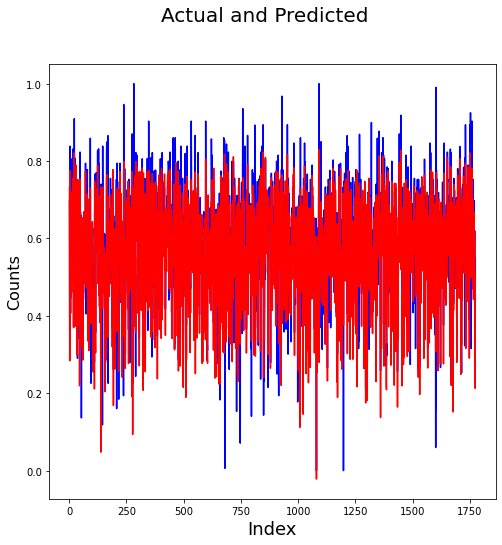

In [24]:
#Actual vs Predicted - Train
c = [i for i in range(1,1775,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_train, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred_train_svr, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

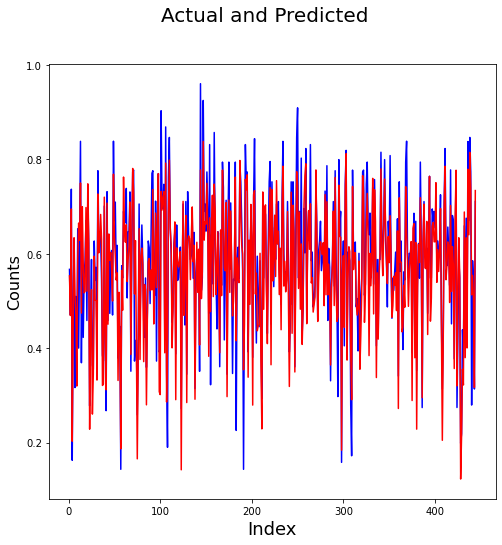

In [25]:
#Actual vs Predicted - Test
c = [i for i in range(1,445,1)]
fig = plt.figure(figsize=(8,8))
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred_test_svr, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)
plt.show()

###### ABLATION STUDY

In [3]:
def create_data(diveFeatures_data):
    X = diveFeatures_data.drop(columns = ['actualscore','vidpath'],axis=1)
    y = diveFeatures_data['actualscore']
    np.random.seed(0)
    X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)
    som_median = X_train['modify_soms.'].median()
    twist_median = X_train['modify_twist'].median()
    predScore_median = X_train['predscore'].median()
    X_train['pred_somersault'] = np.where(X_train['modify_soms.'].notnull(),X_train['modify_soms.'],
                                      np.where((X_train['fine_grained_soms.'].isnull()),0,som_median))

    X_train['pred_twist'] = np.where(X_train['modify_twist'].notnull(),X_train['modify_twist'],
                                      np.where((X_train['fine_grained_twist'].isnull()),0,twist_median))

    X_train['updated_predscore'] = X_train['predscore'].fillna(predScore_median)
    X_test['pred_somersault'] = np.where(X_test['modify_soms.'].notnull(),X_test['modify_soms.'],
                                      np.where((X_test['fine_grained_soms.'].isnull()),0,som_median))

    X_test['pred_twist'] = np.where(X_test['modify_twist'].notnull(),X_test['modify_twist'],
                                      np.where((X_test['fine_grained_twist'].isnull()),0,twist_median))
    X_test['updated_predscore'] = X_test['predscore'].fillna(predScore_median)
    return X_train,X_test,y_train, y_test

In [4]:
X_train,X_test,y_train, y_test = create_data(diveFeatures_data)

In [17]:
def ablationStudy(X_train,X_test,y_train,y_test,cols):
    
    print('\n')
    print('Ablation Study for {0}'.format(cols))
    svr_model = joblib.load(r'svr')
    scaler = joblib.load('minMaxScaler') 
    X_train1 = X_train[cols].values.reshape(-1, 1)
    X_test1 = X_test[cols].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
    print('Train : ', X_train1.shape)
    print('Test : ', X_test1.shape)

    print('------------Modelling----------------')
    svr_model.fit(X_train1, y_train) 
    y_pred_train_svr = svr_model.predict(X_train1)
    y_pred_test_svr = svr_model.predict(X_test1)

    metric3 = []
    r2_train_lr = r2_score(y_train, y_pred_train_svr)
    print('Train R2: ',r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test_svr)
    print('Test R2: ',r2_test_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train_svr)
    print('Train MSE: ',mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_pred_test_svr)
    print('Test MSE: ',mse_test_lr)

    test_corr1, _ = pearsonr(y_pred_test_svr, y_test)
    test_corr2, _ = spearmanr(y_pred_test_svr, y_test)

    print('Test Pearson R Correlation : ',test_corr1)
    print('Test Spearman Correlation : ',test_corr2)
    print('----------------------------------------------------------------')

In [18]:
columnsToTrain = ['pred_twist','bend_angle','entry_angle','pred_somersault','updated_predscore',
                 'mean_splash_index','ctr_area']

In [19]:
for col in columnsToTrain:
    ablationStudy(X_train,X_test,y_train,y_test,col)



Ablation Study for pred_twist
Train :  (1774, 1)
Test :  (444, 1)
------------Modelling----------------
Train R2:  0.009158415600438174
Test R2:  0.0027015984261659076
Train MSE:  0.02115603318844031
Test MSE:  0.02188157599548039
Test Pearson R Correlation :  0.057501439291945115
Test Spearman Correlation :  0.039292106797000494
----------------------------------------------------------------


Ablation Study for bend_angle
Train :  (1774, 1)
Test :  (444, 1)
------------Modelling----------------
Train R2:  -0.0018002025959620305
Test R2:  -0.0006943624597495202
Train MSE:  0.02139001699969
Test MSE:  0.021956086268519602
Test Pearson R Correlation :  0.03559351558786797
Test Spearman Correlation :  0.10444252056672258
----------------------------------------------------------------


Ablation Study for entry_angle
Train :  (1774, 1)
Test :  (444, 1)
------------Modelling----------------
Train R2:  0.0012046927441780042
Test R2:  -0.003556953879890301
Train MSE:  0.02132585773695344